## Practical_Activity_1.1.9

### 1. Prepare your workstation

In [2]:
# Import the necessary libraries:
import pandas as pd
import random
%matplotlib inline
from dataclasses import dataclass
from sensitivity import SensitivityAnalyzer

### 2. Specify the model inputs

In [7]:
# Create a class and instance

@dataclass
class ModelInputs:
    starting_salary: int = 300000
    promos_every_n_years: int = 5
    cost_of_living_raise: float = 0.025
    promo_raise: float = 0.15
    savings_rate: float = 0.20
    interest_rate: float = 0.07
    desired_cash: int = 1500000
        
model_data = ModelInputs()

model_data

ModelInputs(starting_salary=300000, promos_every_n_years=5, cost_of_living_raise=0.025, promo_raise=0.15, savings_rate=0.2, interest_rate=0.07, desired_cash=1500000)

### 3. Write statistical formula

In [8]:
# Calculate wage at a given year from start of the model based on
# cost of living, raises and regular promotion.
def wages_year(data: ModelInputs, year)->float:
    """
    Gets the wage at a given year from the start of the model based
    on cost of living raises and regular promotions.
    """
    # Every n years we have a promotion, so dividing the years and 
    # taking out the decimals gets the number of promotions.
    num_promos = int(year / data.promos_every_n_years)
    
    # This is the formula above implemented in Python.
    salary_t = data.starting_salary * (1 + data.cost_of_living_raise) \
    ** year * (1 + data.promo_raise) ** num_promos
    return salary_t

for i in range(4):
    year = i + 1
    salary = wages_year(model_data, year)
    print(f'The wage at year {year} is ${salary:,.0f}.')

The wage at year 1 is $307,500.
The wage at year 2 is $315,188.
The wage at year 3 is $323,067.
The wage at year 4 is $331,144.


In [9]:
# Calculate the cash saved within a given year:
def cash_saved_during_year(data: ModelInputs, year):
    """
    Calculated the cash saved within a given year, by first
    calculating the salary at that year then applying the
    savings rate.
    """
    salary = wages_year(data, year)
    cash_saved = salary * data.savings_rate
    return cash_saved

In [12]:
# Calculate accumulated wealth for a given year:
def wealth_year(data: ModelInputs, year, prior_wealth):
    """
    Calculate the accumulated wealth for a given year,
    based on previous wealth, the investment rate,
    and cash saved during the year.
    """
    cash_saved = cash_saved_during_year(data, year)
    wealth = prior_wealth * (1 + data.interest_rate) + cash_saved
    return wealth

# Starting with no cash saved:
prior_wealth = 0
for i in range(4):
    year = i + 1
    wealth = wealth_year(model_data, year, prior_wealth)
    print(f'The wealth at year {year} is ${wealth:,.0f}.')
    
    # Set next year's prior wealth to this year's wealth.
    prior_wealth = wealth

The wealth at year 1 is $61,500.
The wealth at year 2 is $128,842.
The wealth at year 3 is $202,475.
The wealth at year 4 is $282,877.


In [17]:
# Run the retirement model; collect salary and wealth information year
# by year and store it in a DataFrame for further analysis:

def get_salaries_wealths_df(data):
    # Start with no cash saved.
    prior_wealth = 0
    wealth = 0
    # The 'year' becomes '1' on the first loop.
    year = 0
    
    df_data_tups = []
    while wealth < data.desired_cash:
        year = year + 1
        salary = wages_year(data, year)
        wealth = wealth_year(data, year, prior_wealth)
        
        # Set next year's prior wealth to this year's wealth:
        prior_wealth = wealth
        
        # Save the results in a tuple for later building the DataFrame:
        df_data_tups.append((year, salary, wealth))
        
    # The while loop has run, so wealth must be >= desired_cash;
    # Create the DataFrame:
    df = pd.DataFrame(df_data_tups, columns = ['Year', 'Salary', 'Wealth'])
    
    return df

In [18]:
# Format DataFrame for display.
get_salaries_wealths_df(model_data)

,Year,Salary,Wealth
0,1,307500.000000,6.150000e+04
1,2,315187.500000,1.288425e+05
2,3,323067.187500,2.024749e+05
3,4,331143.867187,2.828769e+05
4,5,390335.833447,3.807455e+05
5,6,400094.229283,4.874165e+05
6,7,410096.585016,6.035550e+05
7,8,420348.999641,7.298736e+05
8,9,430857.724632,8.671363e+05
9,10,507873.542910,1.029411e+06


In [20]:
# Save the function results into the DataFrame.
results_df = get_salaries_wealths_df(model_data)

# View the DataFrame.
results_df.head()

,Year,Salary,Wealth
0,1,307500.000000,61500.000000
1,2,315187.500000,128842.500000
2,3,323067.187500,202474.912500
3,4,331143.867187,282876.929812
4,5,390335.833447,380745.481589


### 4. Create visualisation

<AxesSubplot:xlabel='Year'>

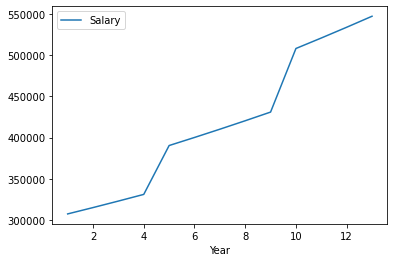

In [21]:
# Visualise wage or salary change over time.
results_df.plot('Year', 'Salary')

<AxesSubplot:xlabel='Year'>

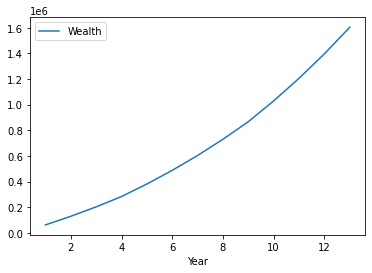

In [22]:
results_df.plot('Year', 'Wealth')